In [32]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.shape

(891, 12)

In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

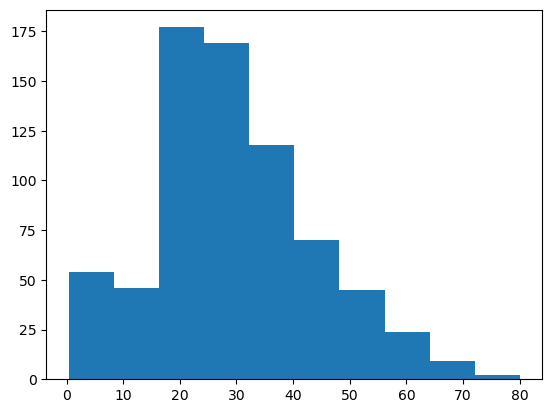

In [36]:
plt.hist(data.Age)

<Axes: xlabel='Fare', ylabel='Age'>

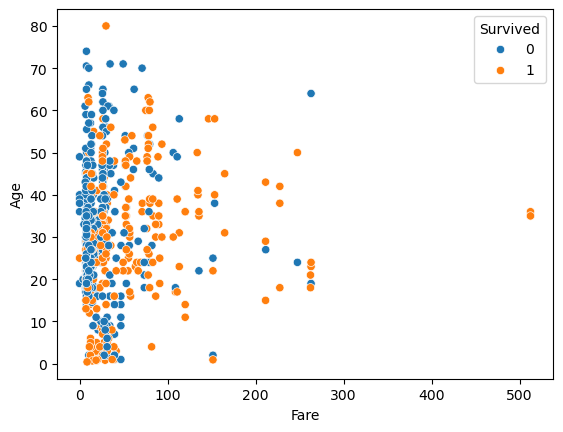

In [48]:
# Graficar la relación entre alcohol y acidez volátil, coloreado por calidad
sns.scatterplot( x ="Fare", y = "Age", hue  ="Survived", data = data)

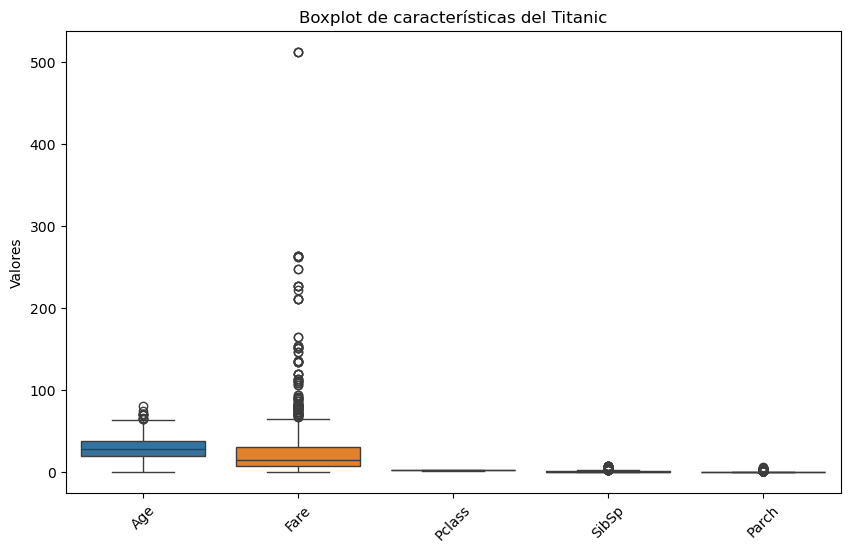

In [54]:
# Características numéricas del Titanic
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']])
plt.xticks(rotation=45)
plt.title('Boxplot de características del Titanic')
plt.ylabel('Valores')
plt.show()

In [66]:
# Ajusta a las variables relevantes en tu dataset
predictors_col = ["Age", "Fare", "Pclass", "SibSp"]
target_col = ['Parch']

In [68]:
predictors = data[predictors_col]
target = data[target_col]

In [62]:
predictors

,Age,Fare,Pclass,SibSp
0,22.0,7.2500,3,1
1,38.0,71.2833,1,1
2,26.0,7.9250,3,0
3,35.0,53.1000,1,1
4,35.0,8.0500,3,0
...,...,...,...,...
886,27.0,13.0000,2,0
887,19.0,30.0000,1,0
888,NaN,23.4500,3,1
889,26.0,30.0000,1,0


In [70]:
target

,Parch
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,2
889,0


In [72]:
corr = predictors.corr()
corr

,Age,Fare,Pclass,SibSp
Age,1.000000,0.096067,-0.369226,-0.308247
Fare,0.096067,1.000000,-0.549500,0.159651
Pclass,-0.369226,-0.549500,1.000000,0.083081
SibSp,-0.308247,0.159651,0.083081,1.000000


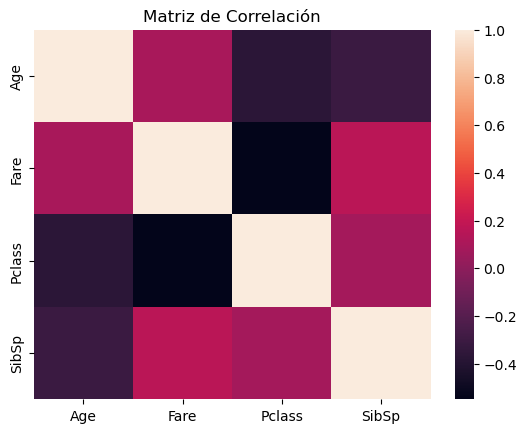

In [74]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [78]:
tree = DecisionTreeClassifier()

In [80]:
arbol = tree.fit(X_train, y_train)

[Text(0.36494140625, 0.9722222222222222, 'x[0] <= 11.5\ngini = 0.383\nsamples = 712\nvalue = [548, 95, 57, 4, 4, 4]'),
 Text(0.03333333333333333, 0.9166666666666666, 'x[1] <= 19.892\ngini = 0.51\nsamples = 52\nvalue = [1, 29, 22, 0, 0, 0]'),
 Text(0.19913736979166666, 0.9444444444444444, 'True  '),
 Text(0.016666666666666666, 0.8611111111111112, 'x[0] <= 10.0\ngini = 0.133\nsamples = 14\nvalue = [1, 13, 0, 0, 0, 0]'),
 Text(0.008333333333333333, 0.8055555555555556, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0, 0]'),
 Text(0.025, 0.8055555555555556, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]'),
 Text(0.05, 0.8611111111111112, 'x[0] <= 8.5\ngini = 0.488\nsamples = 38\nvalue = [0, 16, 22, 0, 0, 0]'),
 Text(0.041666666666666664, 0.8055555555555556, 'x[1] <= 40.633\ngini = 0.498\nsamples = 30\nvalue = [0, 16, 14, 0, 0, 0]'),
 Text(0.03333333333333333, 0.75, 'x[3] <= 0.5\ngini = 0.473\nsamples = 26\nvalue = [0, 16, 10, 0, 0, 0]'),
 Text(0.016666666666666666, 0.694444444444444

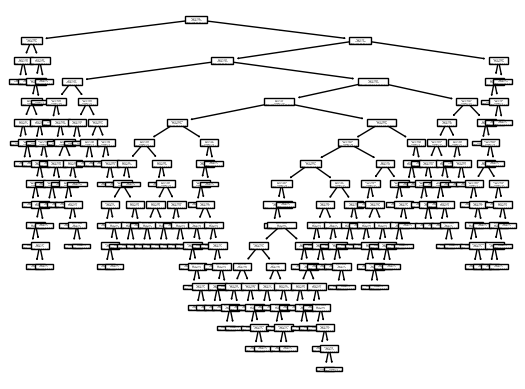

In [82]:
plot_tree(arbol)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.15, random_state=13)

In [86]:
tree = DecisionTreeClassifier()

In [88]:
arbol_2 = tree.fit(X_train, y_train)

[Text(0.28985729356751827, 0.9705882352941176, 'x[0] <= 11.5\ngini = 0.388\nsamples = 757\nvalue = [580.0, 103.0, 62.0, 4.0, 4.0, 4.0]'),
 Text(0.06934306569343066, 0.9117647058823529, 'x[1] <= 26.125\ngini = 0.509\nsamples = 60\nvalue = [1, 33, 26, 0, 0, 0]'),
 Text(0.17960017963047448, 0.9411764705882353, 'True  '),
 Text(0.0364963503649635, 0.8529411764705882, 'x[3] <= 0.5\ngini = 0.349\nsamples = 28\nvalue = [1, 22, 5, 0, 0, 0]'),
 Text(0.014598540145985401, 0.7941176470588235, 'x[1] <= 14.579\ngini = 0.58\nsamples = 10\nvalue = [1, 5, 4, 0, 0, 0]'),
 Text(0.0072992700729927005, 0.7352941176470589, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0, 0]'),
 Text(0.021897810218978103, 0.7352941176470589, 'x[0] <= 10.5\ngini = 0.32\nsamples = 5\nvalue = [1, 0, 4, 0, 0, 0]'),
 Text(0.014598540145985401, 0.6764705882352942, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0, 0, 0]'),
 Text(0.029197080291970802, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]'),
 Text(0

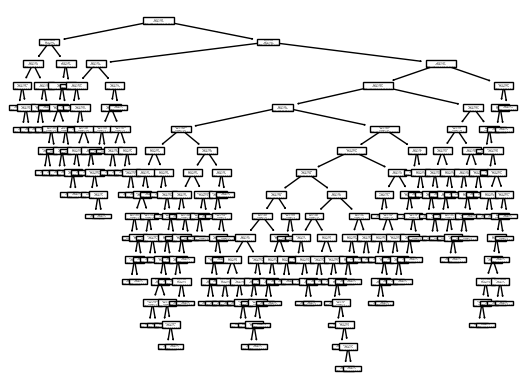

In [90]:
plot_tree(arbol_2)

In [92]:
predicciones = arbol.predict(X_test)

In [94]:
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 5, 1, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [96]:
predicciones = arbol_2.predict(X_test)

In [98]:
predicciones

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 5, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 0, 4, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [100]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1,2,4,5
Actual,,,,,
0,89,7,2,0,0
1,6,6,2,1,0
2,6,6,6,0,0
3,0,1,0,0,0
5,0,0,0,0,1
6,0,0,0,0,1


In [102]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.7611940298507462

In [104]:
precision = precision_score(y_test, predicciones, average='weighted', zero_division=0)
precision

0.7623614600265997

In [106]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

C:\Users\sebas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.7611940298507462

In [108]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.7550903058290742